In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import FunctionTransformer


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
train_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [3]:
train_data_copy = train_data.copy()
train_data_copy.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [4]:
test_data = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')
test_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.0
1,1,2023-06-30 17:44:43,2023-06-30 17:53:13,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.0
2,1,2023-06-29 18:17:04,2023-06-29 19:23:48,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.0
3,0,2023-06-30 21:33:53,2023-06-30 21:46:20,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.0
4,1,2023-06-29 14:53:54,2023-06-29 15:22:17,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.0


In [5]:
train_data.shape, train_data_copy.shape

((175000, 17), (175000, 17))

In [6]:
train_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

In [7]:
train_data_copy.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

# Visualisation

In [8]:
# Converting pickup and dropoff columns to datetime format
train_data_copy['tpep_pickup_datetime'] = pd.to_datetime(train_data_copy['tpep_pickup_datetime'])
train_data_copy['tpep_dropoff_datetime'] = pd.to_datetime(train_data_copy['tpep_dropoff_datetime'])

# Extracting features from pickup datetime
# train_data_copy['pickup_hour'] = train_data_copy['tpep_pickup_datetime'].dt.hour
# train_data_copy['pickup_day'] = train_data_copy['tpep_pickup_datetime'].dt.day
# train_data_copy['pickup_month'] = train_data_copy['tpep_pickup_datetime'].dt.month
train_data_copy['pickup_day_of_week'] = train_data_copy['tpep_pickup_datetime'].dt.dayofweek

# Extracting features from dropoff datetime
# train_data_copy['dropoff_hour'] = train_data_copy['tpep_dropoff_datetime'].dt.hour
# train_data_copy['dropoff_day'] = train_data_copy['tpep_dropoff_datetime'].dt.day
# train_data_copy['dropoff_month'] = train_data_copy['tpep_dropoff_datetime'].dt.month
train_data_copy['dropoff_day_of_week'] = train_data_copy['tpep_dropoff_datetime'].dt.dayofweek

# Calculating duration of the trip in minutes
train_data_copy['trip_duration_minutes'] = (train_data_copy['tpep_dropoff_datetime'] - train_data_copy['tpep_pickup_datetime']).dt.total_seconds() / 60

# Drop the original datetime columns
train_data_copy = train_data_copy.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)


In [9]:
train_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   passenger_count        168923 non-null  float64
 2   trip_distance          175000 non-null  float64
 3   RatecodeID             168923 non-null  float64
 4   store_and_fwd_flag     168923 non-null  object 
 5   PULocationID           175000 non-null  int64  
 6   DOLocationID           175000 non-null  int64  
 7   payment_type           175000 non-null  object 
 8   extra                  175000 non-null  float64
 9   tip_amount             175000 non-null  float64
 10  tolls_amount           175000 non-null  float64
 11  improvement_surcharge  175000 non-null  float64
 12  total_amount           175000 non-null  float64
 13  congestion_surcharge   168923 non-null  float64
 14  Airport_fee            168923 non-nu

In [10]:
# Encoding store_and_fwd_flag and payment_type columns with Label Encoder for visualisation
label_encoder = LabelEncoder()

train_data_copy['store_and_fwd_flag_encoded'] = label_encoder.fit_transform(train_data_copy['store_and_fwd_flag'])
train_data_copy['payment_type_encoded'] = label_encoder.fit_transform(train_data_copy['payment_type'])

train_data_copy = train_data_copy.drop('store_and_fwd_flag', axis=1)
train_data_copy = train_data_copy.drop('payment_type', axis=1)

In [11]:
train_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   VendorID                    175000 non-null  int64  
 1   passenger_count             168923 non-null  float64
 2   trip_distance               175000 non-null  float64
 3   RatecodeID                  168923 non-null  float64
 4   PULocationID                175000 non-null  int64  
 5   DOLocationID                175000 non-null  int64  
 6   extra                       175000 non-null  float64
 7   tip_amount                  175000 non-null  float64
 8   tolls_amount                175000 non-null  float64
 9   improvement_surcharge       175000 non-null  float64
 10  total_amount                175000 non-null  float64
 11  congestion_surcharge        168923 non-null  float64
 12  Airport_fee                 168923 non-null  float64
 13  pickup_day_of_

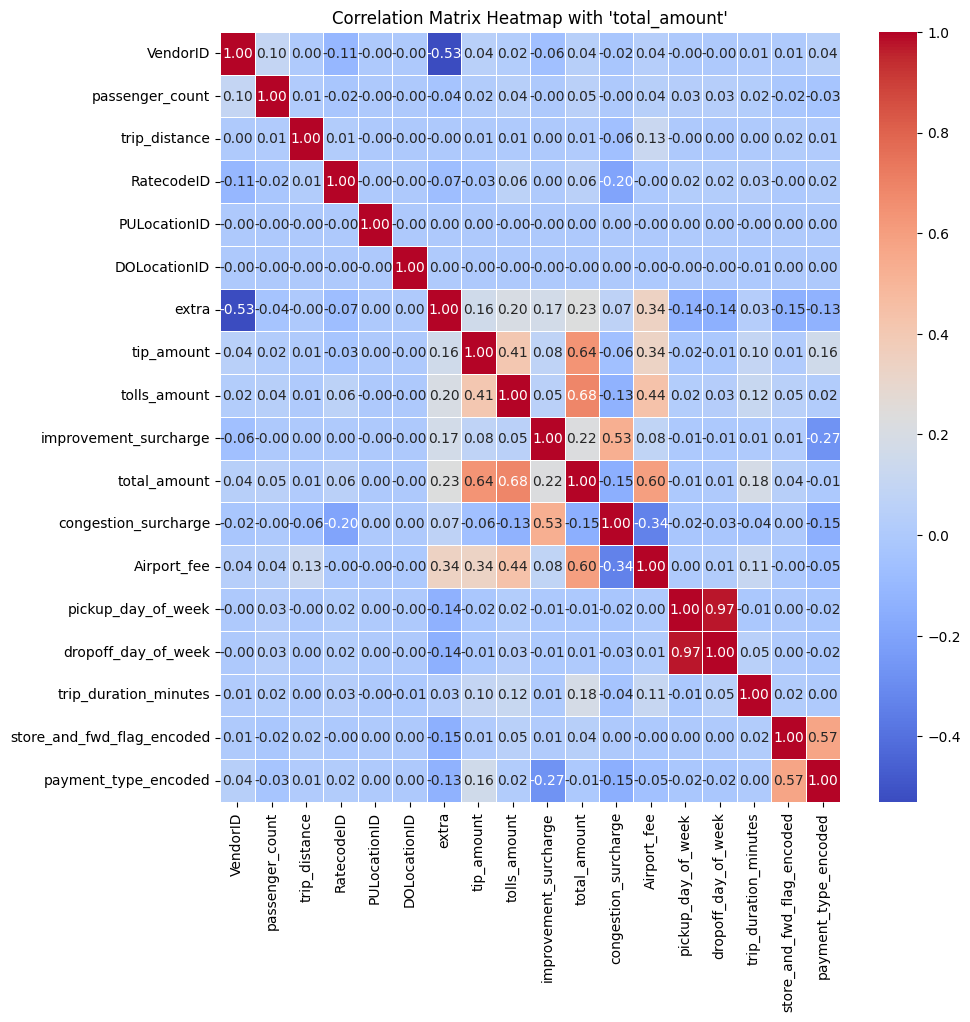

In [12]:
#Correlation Matrix Heatmap with all columns

correlation_matrix = train_data_copy[train_data_copy.columns].corr()

correlation_with_target_column = train_data_copy[train_data_copy.columns].apply(lambda x: x.corr(train_data_copy['total_amount']))

correlation_matrix['total_amount'] = correlation_with_target_column

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths = 0.5)
plt.title("Correlation Matrix Heatmap with 'total_amount'")
plt.show()

## Insights

1. As expected, VendorID, RatecodeID, PULocationID, DOLocationID, pickup_day_of_the_week, dropoff_day_of_the_week, trip_duration_in_minutes, store_and_fwd_flag have almost negligible correlation with Total Amount
2. Surprisingly, passenger_count and trip_distance show similar results
3. We can drop these columns from the dataframe
4. Toll Amount, Tip Amount and Airport Fee show the highest correlation with Total Amount

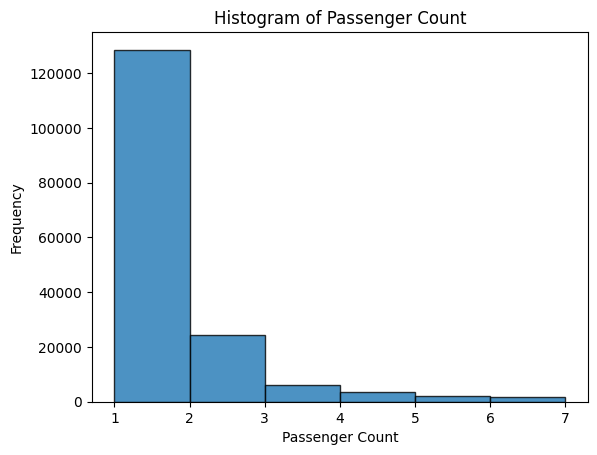

In [13]:
# Histogram of passenger_count column

plt.hist(train_data_copy['passenger_count'], bins=range(1, 8), edgecolor='black', alpha=0.8)
plt.title('Histogram of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')

plt.show()

## Insights

1. 1 passenger is the most frequent
2. Probably why it didn't affect the total_amount

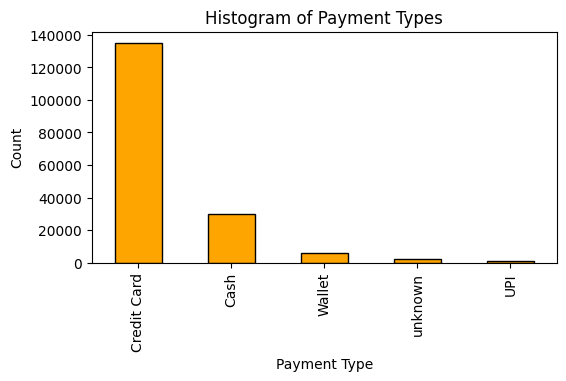

In [14]:
# Histogram of payment_type column from the original dataset where it wasn't encoded

#Checking the type and count of each unique value of the columnn 'payment_types' by plotting a histogram
plt.figure(figsize=(6, 3))
train_data['payment_type'].value_counts().plot(kind='bar', color='orange', edgecolor='black')

# Adding labels and title
plt.title('Histogram of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')

# Display the plot
plt.show()

## Insights

1. Credit Card type payments reign supreme over other types by a huge margin
2. Similar case as passenger_count

# Pipeline

In [15]:
# Splitting the train dataset
features = train_data.drop(columns=['total_amount'])
target = train_data['total_amount']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [16]:
# Dropping some of the irrelevant columns
columns_to_drop = ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', ]

drop_columns_transformer = Pipeline(steps=[('column_dropper', 
                                            FunctionTransformer(lambda x: x.drop(columns=columns_to_drop), validate=False))])

# Creating a transformer to drop columns
drop_columns_transformer = Pipeline(steps=[
    ('column_dropper', FunctionTransformer(lambda x: x.drop(columns=columns_to_drop), validate=False))
])

In [17]:
# Defining numerical and categorical features with missing values for imputation
numerical_features = ['passenger_count', 'trip_distance', 'extra', 'tip_amount']
categorical_features = ['payment_type']

# Creating transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [18]:
# Creating a transformer for label encoding the 'payment_type' column
label_encode_transformer = Pipeline(steps=[
    ('label_encoder', FunctionTransformer(lambda x: x.apply(LabelEncoder().fit_transform)))
])

In [19]:
# Combining transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('drop_columns', drop_columns_transformer, columns_to_drop),
        ('num', numerical_transformer, numerical_features),
        ('cat', label_encode_transformer, ['payment_type']),  # Apply label encoding to 'payment_type'
    ])

In [20]:
# # Full pipeline with a Linear Regressor
# model_lr = Pipeline(steps=[('preprocessor', preprocessor),
#                                 ('regressor', LinearRegression())])

# # Fit the model to the training data
# model_lr.fit(X_train, y_train)

# # Predictions on the test set
# y_pred = model_lr.predict(X_test)

# # Evaluating the model
# r2_lr = r2_score(y_test, y_pred)
# mae_lr = mean_absolute_error(y_test, y_pred)
# mse_lr = mean_squared_error(y_test, y_pred)

# print('Linear Regressor')
# print(f'R-squared : {r2_lr}')
# #0.4590424849963851
# print(f'Mean Absolute Error (MAE) : {mae_lr}')
# #11.45050848135547
# print(f'Mean Squared Error (MSE) : {mse_lr}')
# #352.03251228991786

In [21]:
# # Applying cross-validation on the Linear Regressor
# cv_scores = cross_val_score(model_lr, X_train, y_train, cv=10, scoring='r2')
# print("Cross-validated R² scores:", cv_scores)
# print("Mean R²:", cv_scores.mean())
# print("Standard Deviation R²:", cv_scores.std())

# Cross-validated R² scores: [0.45101375 0.43388485 0.4385543  0.42631261 0.4844447  0.44414524
#  0.44772583 0.4546209  0.42084081 0.27174921]
# Mean R²: 0.42732922118146205
# Standard Deviation R²: 0.054483045086313145

In [22]:
# # Full pipeline with a Decision Tree Regressor
# model_dtr = Pipeline(steps=[('preprocessor', preprocessor),
#                               ('regressor', DecisionTreeRegressor(random_state=42))])

# # Fit the model to the training data
# model_dtr.fit(X_train, y_train)

# # Predictions on the test set
# y_pred = model_dtr.predict(X_test)

# # Evaluating the model
# r2_dtr = r2_score(y_test, y_pred)
# mae_dtr = mean_absolute_error(y_test, y_pred)
# mse_dtr = mean_squared_error(y_test, y_pred)

# print('Decision Tree Regressor')
# print(f'R-squared : {r2_dtr}')
# #0.8269670612605542
# print(f'Mean Absolute Error (MAE) (Decision Tree Regressor): {mae_dtr}')
# #4.763699142857144
# print(f'Mean Squared Error (MSE) (Decision Tree Regressor): {mse_dtr}')
# #112.6025952942857

In [23]:
# # Applying cross-validation on the Decision Tree Regressor
# cv_scores = cross_val_score(model_dtr, X_train, y_train, cv=10, scoring='r2')
# print("Cross-validated R² scores:", cv_scores)
# print("Mean R²:", cv_scores.mean())
# print("Standard Deviation R²:", cv_scores.std())

# Cross-validated R² scores: [0.79532028 0.78952276 0.73659207 0.78512573 0.76755054 0.75773959
#  0.78440352 0.79064567 0.76378324 0.71742319]
# Mean R²: 0.7688106594517273
# Standard Deviation R²: 0.024384377785067548

In [24]:
# # #Full pipeline with a Random Forest Regressor
# model_rfr = Pipeline(steps=[('preprocessor', preprocessor),
#                         ('regressor', RandomForestRegressor(random_state=42))])

# # #Fit the model to the training data
# model_rfr.fit(X_train, y_train)

# # #Predictions on the test set
# y_pred = model_rfr.predict(X_test)

# # #Evaluating the model
# r2_rfr = r2_score(y_test, y_pred)
# mae_rfr = mean_absolute_error(y_test, y_pred)
# mse_rfr = mean_squared_error(y_test, y_pred)

# print('Random Forest Regressor')
# print(f'R-squared : {r2_rfr}')
# #0.8937360943727466
# print(f'Mean Absolute Error (MAE) : {mae_rfr}')
# #3.7518812928571426
# print(f'Mean Squared Error (MSE) : {mse_rfr}')
# #69.15210275515035

In [25]:
# # Applying cross-validation on the Random Forest Regressor
# # cv_scores = cross_val_score(model_rfr, X_train, y_train, cv=5, scoring='r2')
# # print("Cross-validated R² scores:", cv_scores)
# # print("Mean R²:", cv_scores.mean())
# # print("Standard Deviation R²:", cv_scores.std())

# Cross-validated R² scores: [0.86748497 0.86585187 0.87087769 0.8689381  0.83310333]
# Mean R²: 0.8612511917724699
# Standard Deviation R²: 0.014171000398241316

In [26]:
# # HPT for better r2 score
# model_rfr = Pipeline(steps=[('preprocessor', preprocessor),
#                              ('regressor', RandomForestRegressor(random_state=42))])

# # Defining the parameter grid for hyperparameter tuning
# param_grid = {
#     'regressor__n_estimators': [100, 200, 300],
#     'regressor__max_depth': [None, 15, 20, 25],
#     'regressor__min_samples_split': [2, 5, 10],
#     'regressor__min_samples_leaf': [1, 2, 4]
# }

# # Use GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(model_rfr, param_grid, cv = 5, scoring = 'r2', verbose = 2, n_jobs = -1)

# # Fit the model with hyperparameter tuning
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)

# # Predictions on the test set with the best model
# y_pred_tuned = grid_search.predict(X_test)

# # Evaluate the tuned model
# r2_tuned = r2_score(y_test, y_pred_tuned)

# print(f'R-squared (Random Forest Regressor - Tuned): {r2_tuned}')
# # Best Hyperparameters: {'regressor__max_depth': 10, 'regressor__n_estimators': 200}
# # R-squared (Random Forest Regressor - Tuned): 0.905894511224275

In [27]:
# # Full Pipeline with XGBoost 
# model_xgb = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', XGBRegressor(random_state=42))
# ])

# # Fitting the model
# model_xgb.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model_xgb.predict(X_test)

# # Evaluating the model
# r2_xgb = r2_score(y_test, y_pred)
# mae_xgb = mean_absolute_error(y_test, y_pred)
# mse_xgb = mean_squared_error(y_test, y_pred)

# print(f'XGBoost')
# print(f'R-squared : {r2_xgb}')
# #0.9058221464142646
# print(f'Mean Absolute Error (MAE): {mae_xgb}')
# #3.4642327764894665
# print(f'Mean Squared Error (MSE): {mse_xgb}')
# #61.28700587445746

In [28]:
# # Applying cross-validation on the XGBoost Regressor
# cv_scores = cross_val_score(model_xgb, X_train, y_train, cv=5, scoring='r2')
# print("Cross-validated R² scores:", cv_scores)
# print("Mean R²:", cv_scores.mean())
# print("Standard Deviation R²:", cv_scores.std())

# Cross-validated R² scores: [0.88526395 0.87498918 0.88501091 0.88427291 0.84313775]
# Mean R²: 0.8745349385462236
# Standard Deviation R²: 0.016159674128074612

In [29]:
# Full Pipeline with Bagging and XGBoost
model_bagging_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', BaggingRegressor(estimator=XGBRegressor(random_state=42), random_state=42))
])

# Fitting the model
model_bagging_xgb.fit(X_train, y_train)

# Making predictions on the test set
y_pred_bagging = model_bagging_xgb.predict(X_test)

# Evaluating the model
r2_bagging_xgb = r2_score(y_test, y_pred_bagging)
mae_bagging_xgb = mean_absolute_error(y_test, y_pred_bagging)
mse_bagging_xgb = mean_squared_error(y_test, y_pred_bagging)

print(f'Bagging + XGBoost')
print(f'R-squared : {r2_bagging_xgb}')
#0.9089430468146474
print(f'Mean Absolute Error (MAE): {mae_bagging_xgb}')
#3.4642327764894665
print(f'Mean Squared Error (MSE): {mse_bagging_xgb}')
#61.28700587445746

Bagging + XGBoost
R-squared : 0.9089430468146474
Mean Absolute Error (MAE): 3.409770951189172
Mean Squared Error (MSE): 59.256054500122644


In [30]:
# # Applying cross-validation on the XGBoost Regressor + Bagging
# cv_scores = cross_val_score(model_bagging_xgb, X_train, y_train, cv=5, scoring='r2')
# print("Cross-validated R² scores:", cv_scores)
# print("Mean R²:", cv_scores.mean())
# print("Standard Deviation R²:", cv_scores.std())

In [31]:
# # HPT for BaggingRegressor with XGBoost 
# model_bagging_xgb = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', BaggingRegressor(estimator=XGBRegressor(random_state=42), random_state=42))
# ])

# # Define the parameter grid for hyperparameter tuning
# param_grid_bagging_xgb = {
#     'regressor__n_estimators': [50, 100, 200],
#     'regressor__estimator__learning_rate': [0.01, 0.1, 0.2],
#     'regressor__estimator__max_depth': [3, 6, 9],
#     'regressor__estimator__subsample': [0.5, 0.7, 0.9],
#     'regressor__estimator__colsample_bytree': [0.5, 0.7, 0.9],
#     'regressor__max_samples': [0.5, 0.7, 0.9],
#     'regressor__max_features': [0.5, 0.7, 0.9],
#     'regressor__bootstrap': [True, False],
#     # Add other hyperparameters for tuning as needed
# }

# # Use GridSearchCV for hyperparameter tuning
# grid_search_bagging_xgb = GridSearchCV(model_bagging_xgb, param_grid_bagging_xgb, cv=5, scoring='r2', verbose=2, n_jobs=-1)

# # Fit the model with hyperparameter tuning
# grid_search_bagging_xgb.fit(X_train, y_train)

# # Print the best hyperparameters
# print("Best Hyperparameters (Bagging + XGBoost):", grid_search_bagging_xgb.best_params_)

# # Predictions on the test set with the best model
# y_pred_tuned_bagging_xgb = grid_search_bagging_xgb.predict(X_test)

# # Evaluate the tuned model
# r2_tuned_bagging_xgb = r2_score(y_test, y_pred_tuned_bagging_xgb)
# print(f'R-squared (Tuned Bagging + XGBoost): {r2_tuned_bagging_xgb}')

# # Ran for more than 7 hours

## Scores of different models in different metrics

| Sl. No. | Model | R2 Score | Mean Absolute Error (MAE) | Mean Squared Error (MSE) |
|-----------------|-----------------|-----------------|-----------------|-----------------|
| 1    | Linear Regressor | 0.4590424849963851 | 11.45050848135547 | 352.03251228991786|
| 2    | Decision Tree Regressor | 0.8269670612605542 | 4.763699142857144 | 112.6025952942857 |
| 3    | Random Forest Regressor | 0.8937360943727466 | 3.7518812928571426 | 69.15210275515035 |
| 4    | Random Forest Regressor with HPT | 0.905894511224275 | - | - |
| 5    | XGBoost Regressor | 0.9058221464142646 | 3.4642327764894665 | 61.28700587445746 |
| 6    | XGBoost Regressor with Bagging | 0.9089430468146474 | 3.409770951189172 | 59.256054500122644 |
| 7    | XGBoost Regressor with Bagging and HPT | - | - | - |

In [32]:
#Running on test data now
test_pred = model_bagging_xgb.predict(test_data)

In [33]:
submission = pd.DataFrame({"ID": np.arange(1,50001), 
                           "total_amount": test_pred}) 

submission.to_csv('submission.csv',index=False)

# Old school method

In [34]:
# #Removing some of the irrelevant columns
# train_data_copy = train_data_copy.drop(columns=['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID'])
# test_data_copy = test_data_copy.drop(columns=['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID'])

In [35]:
# train_data_copy.isnull().sum(), test_data_copy.isnull().sum()

In [36]:
# #Handling all the missing values in both train and test datasets with SimpleImputer
# from sklearn.impute import SimpleImputer

# #Making a list of all columns to with missing values
# incomplete_columns = ['passenger_count', 'congestion_surcharge', 'Airport_fee']

# imputer = SimpleImputer(strategy = 'mean')

# # Fitting the imputer for test and train sets both
# train_data_copy[incomplete_columns] = imputer.fit_transform(train_data_copy[incomplete_columns])
# test_data_copy[incomplete_columns] = imputer.fit_transform(test_data_copy[incomplete_columns])

In [37]:
# #Confirming that all null values have been handled with train and test datasets
# train_data_copy.isnull().sum()

In [38]:
# train_data_copy.info()

In [39]:
# import matplotlib.pyplot as plt

# #Checking the type and count of each unique value of the columnn 'payment_types' by plotting a histogram
# plt.figure(figsize=(6, 3))
# train_data_copy['payment_type'].value_counts().plot(kind='bar', color='orange', edgecolor='black')

# # Adding labels and title
# plt.title('Histogram of Payment Types')
# plt.xlabel('Payment Type')
# plt.ylabel('Count')

# # Display the plot
# plt.show()

In [40]:
# #Encoding the 'payment_types' column with Label Encoder
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()

# train_data_copy['payment_type_encoded'] = label_encoder.fit_transform(train_data_copy['payment_type'])
# test_data_copy['payment_type_encoded'] = label_encoder.fit_transform(test_data_copy['payment_type'])

In [41]:
# train_data_copy['payment_type_encoded'].value_counts()

In [42]:
# #Removing the original categorial column 'payment_type'
# train_data_copy = train_data_copy.drop(columns=['payment_type'])
# test_data_copy = test_data_copy.drop(columns=['payment_type'])

In [43]:
# #Confirming removal of the 'payment_type' column
# train_data_copy.head()

In [44]:
# import seaborn as sns

# #Correlation Matrix
# correlation_matrix = train_data_copy.corr()

# total_amount_correlation = correlation_matrix['total_amount']

# sorted_correlation = total_amount_correlation.abs().sort_values(ascending=False)

# top_features = sorted_correlation.head(15) 

# subset_matrix = train_data_copy[top_features.index].corr()

# plt.figure(figsize=(8, 6))
# sns.heatmap(subset_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)
# plt.title('Correlation Matrix with Total Amount (Top Features)')
# plt.show()

In [45]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score

# # Features (X) and target variable (y)
# features = train_data_copy.drop(columns=['total_amount'])
# target = train_data_copy['total_amount']

# # Splitting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [46]:
# from sklearn.linear_model import LinearRegression

# # Create a linear regression model
# model_lr = LinearRegression()

# # Fit the model to the training data
# model_lr.fit(X_train, y_train)

# # Predictions on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model
# r2 = r2_score(y_test, y_pred)

# print(f'R_squared: {r2}')

# # Plotting predictions vs. actual values
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred)
# plt.xlabel('Actual Total Amount')
# plt.ylabel('Predicted Total Amount')
# plt.title('Linear Regression: Predicted vs. Actual Total Amount')
# plt.show()

In [47]:
# #Running Linear Regression on test data now
# test_lr = model_lr.predict(test_data_copy)

# test_lr

In [48]:
# test_lr = pd.DataFrame({'ID': np.arange(1,50001), 'total_amount': test_lr})
# test_lr.to_csv("submission.csv", index=False)

In [49]:
# submission = pd.DataFrame({"ID": np.arange(1,50001), 
#                            "total_amount": test_lr}) 

# submission.to_csv('submission.csv',index=False)

In [50]:
# from sklearn.tree import DecisionTreeRegressor

# # Create a Decision Tree regressor model
# model_dtr = DecisionTreeRegressor(random_state=42)

# # Fit the model to the training data
# model_dtr.fit(X_train, y_train)

# # Predictions on the test set
# y_pred = model_dtr.predict(X_test)

# # Evaluate the model
# r2 = r2_score(y_test, y_pred)

# print(f'R_squared: {r2}')

In [51]:
# #Running Decision Tree Regressor on test data now
# test_dtr = model_dtr.predict(test_data_copy)

# test_dtr

In [52]:
# submission = pd.DataFrame({"ID": np.arange(1,50001), 
#                            "total_amount": test_dtr}) 

# submission.to_csv('submission.csv',index=False)

In [53]:
# from sklearn.ensemble import RandomForestRegressor

# # Create a Random Forest regressor model
# model_rfr = RandomForestRegressor(random_state=42)

# # Fit the model to the training data
# model_rfr.fit(X_train, y_train)

# # Predictions on the test set
# y_pred = model_rfr.predict(X_test)

# # Evaluate the Random Forest model
# rf_r2 = r2_score(y_test, y_pred)

# print(f'Random Forest - R-squared: {rf_r2}')

In [54]:
# #Running Random Forest Regressor on test data now
# test_rfr = model_rfr.predict(test_data_copy)

# test_rfr

In [55]:
# submission = pd.DataFrame({"ID": np.arange(1,50001), 
#                            "total_amount": test_rfr}) 

# submission.to_csv('submission.csv',index=False)

In [56]:
# from sklearn.svm import SVR
# from sklearn.preprocessing import StandardScaler

# # Scale the features using StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Create an SVM regressor model
# svm_model = SVR()

# # Fit the model to the scaled training data
# svm_model.fit(X_train_scaled, y_train)

# # Predictions on the scaled test set
# svm_y_pred = svm_model.predict(X_test_scaled)

# # Evaluate the SVM model
# svm_mse = mean_squared_error(y_test, svm_y_pred)
# svm_r2 = r2_score(y_test, svm_y_pred)

# print(f'SVM - Mean Squared Error: {svm_mse:.2f}')
# print(f'SVM - R-squared: {svm_r2:.2f}')


In [57]:
# from sklearn.model_selection import train_test_split
# from sklearn.dummy import DummyRegressor

# X = train_data.drop(columns=['total_amount'])
# y = train_data['total_amount']
# dummy_regressor = DummyRegressor(strategy='mean')

# # Fitting the Dummy Regressor on the training data
# dummy_regressor.fit(X,y)

# X_test=pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv")
# # Make predictions using the Dummy Regressor
# y_pred = dummy_regressor.predict(X_test)

In [58]:
# submission = pd.DataFrame({"ID": np.arange(1,50001), 
#                            "total_amount": y_pred}) 

# submission.to_csv('submission.csv',index=False)